# Business Problem
 
The rise of deep fake technology has made it increasingly difficult to distinguish between genuine and manipulated content. This challenge poses a significant threat to public trust and informed discourse, especially on digital media platforms where news is rapidly disseminated. **Facto**: a news media Company initiative aims develop solutions to detect and mitigate the spread of deep fake news content, ensuring the integrity of information shared online.

In [1]:
# Import necessary libraries for machine learning and model evaluation
!pip install wordcloud
!pip install textblob
import requests
from bs4 import BeautifulSoup
import csv
from textblob import TextBlob
import pandas as pd
from wordcloud import WordCloud
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn import preprocessing
from scipy.spatial import distance
import warnings
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats  
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from joblib import dump
from joblib import load
from IPython.display import FileLink
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from datetime import datetime, timedelta
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve, auc
from IPython.display import FileLink

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/siddhantdhyani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siddhantdhyani/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data preparation

This Python script automates the process of gathering news articles related to fake news topics from Google News. By utilizing web scraping techniques, it extracts news titles based on specific search keywords such as synthetic news, deep fake, AI-generated content, rumors, and hoaxes. The script employs sentiment analysis on the titles of news articles, providing insights into the prevailing sentiment surrounding fake news topics.

By leveraging automation and sentiment analysis techniques, this script comprehensively gathers and analyze authenticity of news articles.

Key Features:-
1. **Efficient Data Gathering**: The script efficiently retrieves relevant articles from Google News, enabling comprehensive coverage of fake news topics.
 
2. **Sentiment Analysis**: Through integration with the TextBlob library, the script performs sentiment analysis on article titles, capturing sentiment polarity and sentiment subjectivity scores. This analysis offers valuable insights into the overall sentiment associated with news topics.
 
3. **Structured Data Export**: Articles and sentiment analysis results are exported to CSV files, facilitating further analysis and visualization of the collected data. Then these multiple CSV files are merged together to form a new CSV named, **'merged_google_news.csv'**.

In [2]:
# Function to scrape Google News for news articles
def scrape_google_news_for_fake_news(search_query):
    # Define the base URL for Google News
    base_url = "https://news.google.com"
    # Define the search query parameter
    search_url = f"{base_url}/search?q={search_query}&hl=en-US&gl=US&ceid=US:en"
    print("Search Query=", search_url)
    # Send a request to the Google News URL
    response = requests.get(search_url)
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all news articles
        articles = soup.find_all('article')

        # List to hold scraped news data
        news_data = []
        for article in articles:
            # Initializing a dictionary to store article information
            article_info = {}
            # Extract the title
            title = article.find('a', class_='JtKRv')
            if title:
                title_text = title.get_text()
                article_info['title'] = title_text
                # Perform sentiment analysis on the title
                sentiment = TextBlob(title_text).sentiment
                article_info['sentiment_polarity'] = sentiment.polarity
                article_info['sentiment_subjectivity'] = sentiment.subjectivity
            # Extract the link and link body
            link = article.find('a', href=True)
            if link:
                article_info['link'] = base_url + link['href'][1:]  # Remove the './' from the href
                article_info['link_body'] = link.string if link.string else link.get_text()
            # Extract the source and time
            source_and_time = article.find('time')
            if source_and_time:
                article_info['source'] = source_and_time.parent.get_text()
                article_info['time'] = source_and_time.get_text()

            # Add the article information to the news_data list
            if article_info:
                news_data.append(article_info)

        # Return the list of scraped news data
        return news_data
    else:
        # If the request was not successful, return an empty list
        return []
    
# Function to export news data to a CSV file
def export_to_csv(news_data, file_name):
    # Define the CSV file headers
    headers = ['title', 'link', 'link_body', 'source', 'time', 'sentiment_polarity', 'sentiment_subjectivity']
    # Create or overwrite the CSV file with the specified file name
    with open(f"{file_name}.csv", 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        # Write the header
        writer.writeheader()
        # Write the news data
        for article in news_data:
            writer.writerow(article)

# Call the scrape function to get fake news articles
news_articles = scrape_google_news_for_fake_news("synthetic+news")
news_articles2 = scrape_google_news_for_fake_news("deep+fake")
news_articles3 = scrape_google_news_for_fake_news("AI+generated")
news_articles4 = scrape_google_news_for_fake_news("rumours")
news_articles5 = scrape_google_news_for_fake_news("hoax")

# Export the articles to a CSV file with the specified file name
export_to_csv(news_articles, 'googlesyntheticenews')
export_to_csv(news_articles2, 'googledeepFake')
export_to_csv(news_articles3, 'googleAIgen')
export_to_csv(news_articles4, 'googleRumours')
export_to_csv(news_articles5, 'googlehoax')


# Load the datasets
df1 = pd.read_csv('googlesyntheticenews.csv', usecols=['title', 'link', 'link_body', 'source', 'time', 'sentiment_polarity', 'sentiment_subjectivity'])
df2 = pd.read_csv('googledeepFake.csv', usecols=['title', 'link', 'link_body', 'source', 'time', 'sentiment_polarity', 'sentiment_subjectivity'])
df3 = pd.read_csv('googleAIgen.csv', usecols=['title', 'link', 'link_body', 'source', 'time', 'sentiment_polarity', 'sentiment_subjectivity'])
df4 = pd.read_csv('googleRumours.csv', usecols=['title', 'link', 'link_body', 'source', 'time', 'sentiment_polarity', 'sentiment_subjectivity'])
df5 = pd.read_csv('googlehoax.csv', usecols=['title', 'link', 'link_body', 'source', 'time', 'sentiment_polarity', 'sentiment_subjectivity'])

# Concatenating dataframes
merged_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Export the merged dataset to a new CSV file
merged_df.to_csv('merged_google_news.csv', index=False)

Search Query= https://news.google.com/search?q=synthetic+news&hl=en-US&gl=US&ceid=US:en
Search Query= https://news.google.com/search?q=deep+fake&hl=en-US&gl=US&ceid=US:en
Search Query= https://news.google.com/search?q=AI+generated&hl=en-US&gl=US&ceid=US:en
Search Query= https://news.google.com/search?q=rumours&hl=en-US&gl=US&ceid=US:en
Search Query= https://news.google.com/search?q=hoax&hl=en-US&gl=US&ceid=US:en


# Data Analysis and Visualisation

This Python script utilizes the WordCloud library to generate a visual representation of trends in fake news articles extracted from Google News. By analyzing the titles of these articles, the script creates a word cloud image highlighting the frequency of words used in the titles.
 
**Key Features:**
1. **Data Loading**: The script loads the merged dataset containing titles of fake news articles obtained from Google News.
 
2. **Word Cloud Generation**: Using the WordCloud library, the script combines all article titles into a single string and generates a word cloud image. In this image, the size of each word corresponds to its frequency in the titles, visually emphasizing prevalent themes or topics. The word cloud allows for the quick identification of recurring themes or topics prevalent in fake news articles. This insight helped in understanding the focus areas of fake news dissemination.
 
3. **Highlighting Key Terms**: Prominent words in the word cloud provide insight into the language and terminology commonly used in fake news titles. This understanding aids in recognizing potential keywords associated with misinformation and disinformation.
 
4. **Tracking Emerging Trends**: Changes in the word cloud over time can indicate shifts in fake news narratives or emerging trends within the realm of misinformation, providing valuable insights for researchers and policymakers.



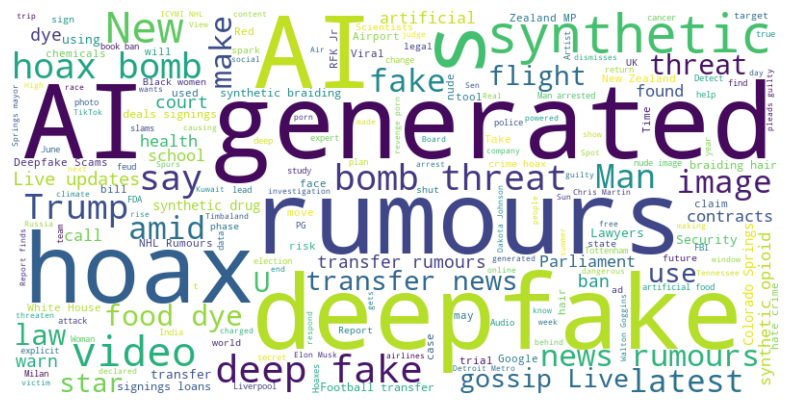

In [3]:
# Load the merged dataset
df = pd.read_csv('merged_google_news.csv')

# Combine all titles into a single string
text = ' '.join(title for title in df['title'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Data Analysis and Data Cleaning

This Python script leverages various text preprocessing and analysis techniques to extract insights from the titles of news obtained from Google News. By applying Natural Language Processing (NLP) methodologies, it performs tasks such as word count calculation, average word length computation, removal of stopwords and punctuation, as well as identifying common and rare words. Additionally, it utilizes sentiment analysis to classify the sentiment polarity of the article titles.
 
**Key Features:**
1. **Text Preprocessing**: The script employs a series of preprocessing steps such as calculating word count, average word length, and identifying stopwords, hashtags, numeric characters, and uppercase words in the article titles.
 
2. **Normalization**: It standardizes the text data by converting all titles to lowercase and removing punctuation, stopwords, and common/rare words.
 
3. **Feature Engineering**: The script computes term frequency, inverse document frequency, and TF-IDF scores to quantify the importance of words in the article titles.
 
4. **Vectorization**: Utilizing techniques such as Bag of Words (BoW) and TF-IDF vectorization, it converts the processed text data into numerical representations suitable for machine learning algorithms.
 
5. **Sentiment Analysis**: By utilizing the TextBlob library, the script performs sentiment analysis on the cleaned titles, assigning sentiment polarity scores to each title.
 
**Potential Insights:**
1. **Text Characteristics**: The analysis reveals insights into the linguistic characteristics of fake news titles, including word usage patterns, average word lengths, and prevalence of certain types of words such as stopwords or numeric characters.
 
2. **Sentiment Classification**: The sentiment analysis provides an understanding of the emotional tone conveyed by fake news titles, helping to categorize them into positive, negative, or neutral sentiment categories.
 
3. **Feature Importance**: By computing TF-IDF scores, the script identifies the most significant words in the titles, shedding light on the key topics or themes prevalent in fake news articles.
 
Through comprehensive text analysis and sentiment classification, this script offers valuable insights into the linguistic and emotional aspects of fake news articles. By leveraging NLP techniques, it enables a deeper understanding of the content and sentiment of fake news titles, facilitating further analysis and decision-making in the realm of misinformation detection and mitigation.

In [4]:
train = pd.read_csv('merged_google_news.csv')
#Word Count of news titles
train['word_count'] = train['title'].apply(lambda x: len(str(x).split(" ")))
train[['title','word_count']].head()

#Character Count in Title
train['char_count'] = train['title'].str.len() 
train[['title','char_count']].head()

#Average Words method
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['title'].apply(lambda x: avg_word(x))
train[['title','avg_word']].head()


stop = stopwords.words('english')

train['stopwords'] = train['title'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['title','stopwords']].head()

train['hastags'] = train['title'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['title','hastags']].head()

train['numerics'] = train['title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['title','numerics']].head()

train['upper'] = train['title'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['title','upper']].head()

train['updated_title'] = train['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['title'].head()

#Remove Punctuations
train['updated_title'] = train['title'].str.replace('[^\w\s]','')
train['title'].head()

# Removal of Stop words
stop = stopwords.words('english')
train['updated_title'] = train['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['title'].head()

#Common word removal

freq = pd.Series(' '.join(train['updated_title']).split()).value_counts()[:10]

freq = list(freq.index)
train['updated_title'] = train['title'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['title'].head()

# Rare word remover
freq = pd.Series(' '.join(train['title']).split()).value_counts()[-10:]
freq = list(freq.index)
train['updated_title'] = train['title'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['updated_title'].head()

# Spelling Correction
from textblob import TextBlob
train['updated_title'][:5].apply(lambda x: str(TextBlob(x).correct()))

# Term Frequency, Ratio of count of a word presnt in a sentence
tf1 = (train['updated_title'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

#Tokenization
TextBlob(train['updated_title'][1]).words

# Inverse document frequency 
import numpy as np
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['updated_title'].str.contains(word)])))

tf1

# Inverse document frequency  score
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

#Term Frequency – Inverse Document Frequency (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['updated_title'])

train_vect

#Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['updated_title'])
train_bow

#Sentiment Analysis
train['updated_title'][:5].apply(lambda x: TextBlob(x).sentiment)

train['sentiment'] = train['updated_title'].apply(lambda x: TextBlob(x).sentiment[0] )
train[['updated_title','sentiment']].head()


train.to_csv('merged_google_news.csv', index=False)

# Initially, we performed manual labeling of the data to identify deep fake news content. However, after careful consideration, we decided to explore the implementation of a plausible clause using Python code. This approach would automate the process of detecting and classifying news articles, potentially improving efficiency and scalability compared to manual labeling.



Code defines a function called label_headline_csv that aims to classify news headlines as either 'Real' or 'Fake' based on the presence of certain keywords related to topics like synthetic media, AI ethics, deepfakes, and other relevant subjects. 

**Labeling Function:** The label_headline_csv function takes a headline as input and performs the following steps:
It defines a list of plausible_topics related to AI, synthetic media, and misinformation.
It checks if any of the plausible_topics are present in the headline (case-insensitive).

If a plausible topic is found, the function returns 'Real', indicating that the headline is potentially related to a real news story about these topics.

If none of the plausible topics are found, the function returns 'Fake', assuming that the headline is unlikely to be about a real news story on these subjects.

Applying the Labeling Function: The code applies the label_headline_csv function to the 'updated_title' column of the df DataFrame, creating a new column called 'Refined-label' that contains the labels ('Real' or 'Fake') for each headline.

**Displaying the Results:** The code displays the first few rows of the df DataFrame, showing the original 'title' column and the newly created 'Refined-label' column.

**Exporting to CSV:** Finally, the code exports the updated df DataFrame to a CSV file named 'merged_google_news.csv', without including the row indices.

In [5]:
# Define a function to label the headlines as 'True' or 'False' based on the content's plausibility.

df = pd.DataFrame(train)
print(df.head)
def label_headline_csv(headline):
    """
    Labels a headline as 'True' or 'False' based on plausibility and known patterns.
    This is a heuristic approach and doesn't verify factual content.
    """
    # List of topics that are plausible and have been discussed in relation to AI and synthetic media
    plausible_topics = [
        'synthetic media', 'ai ethics', 'deepfakes','ai avatars', 'content disclosure', 'deep fake', 'rumours','hoax'
    ]

    # If the headline contains plausible topics, it is labeled 'True'
    if any(topic in headline.lower() for topic in plausible_topics):
        return 'Real'
    
    # If it doesn't contain any known plausible topics, label it as 'False'
    return 'Fake'

# Applying the labeling function to the 'title' column in the CSV data
df['Refined-label'] = df['updated_title'].apply(label_headline_csv)

# Showing the updated dataframe
df[['title', 'Refined-label']].head()

# Export the articles to a CSV file with the specified file name
df.to_csv('merged_google_news.csv',index=False)

<bound method NDFrame.head of                                                  title  \
0    Coca-Cola and Seawater to Power Cars: Groundbr...   
1    Santa Clarita man pleads guilty in death due t...   
2    Report: Synthetic Opioids, Cathinones Surge in...   
3    Synthetic Grass Warehouse Unveils New Atlanta ...   
4    Many Black women consider synthetic braids saf...   
..                                                 ...   
495  Trump’s Environmental Claims Ignore Decades of...   
496  Air India, IndiGo: Hoax bomb threats spark pan...   
497  Air India, IndiGo: How bomb hoaxes are giving ...   
498  ‘A wrecking ball’: experts warn Trump’s win se...   
499  Singaporean charged for making hoax bomb threa...   

                                                  link  link_body  \
0    https://news.google.com/read/CBMiygFBVV95cUxOM...        NaN   
1    https://news.google.com/read/CBMizgFBVV95cUxQW...        NaN   
2    https://news.google.com/read/CBMiiAFBVV95cUxOZ...        NaN 

# Code Readability


This Python script facilitates the conversion of time-related information extracted from fake news articles into a standardized format, expressed in hours relative to the current date.
 
**Key Features:**
1. **Time Conversion Function**: The script defines a function `convert_time_to_hours` to convert diverse time formats into hours relative to the current date. It handles time representations such as 'hour ago', 'Yesterday', 'day ago', and specific dates ('Month Day' or 'Month, Day Year').
 
2. **Data Loading**: It loads the dataset containing fake news articles, likely obtained from Google News, into a Pandas DataFrame.
 
4. **Time Conversion**: Using the defined function, the script applies time conversion to the 'time' column of the DataFrame, creating a new column **'time_in_hours'** that represents the time elapsed since the publication of each article in hours.
 
5. **Data Export**: If required, the modified DataFrame with the additional time information is saved back to a new CSV file named 'merged_google_news.csv'.
 
**Potential Insights:**
1. **Standardized Time Representation**: By converting diverse time formats into a uniform unit (hours), the script ensures consistency in time representation across fake news articles, facilitating temporal analysis and comparison.
 
2. **Temporal Trends Analysis**: The time information in hours enables the examination of temporal trends in fake news publication, including peak activity periods, frequency distribution of article publication times, and temporal correlation with other variables.
 
Through time conversion and data manipulation, this script enhances the usability and interpretability of fake news article data by providing standardized time representations. By enabling temporal analysis and facilitating time-based filtering, it supports deeper insights into the temporal dynamics of fake news dissemination

In [6]:
# Load the dataset
df = pd.read_csv('merged_google_news.csv')

# Current date based on user profile
current_date = datetime(2024, 4, 6)

# Function to convert time to hours
def convert_time_to_hours(time_str):
    if 'hour' in time_str:
        # Extract the number of hours directly
        hours = int(time_str.split(' ')[0])
    elif 'Yesterday' in time_str:
        # 'Yesterday' is equivalent to 24 hours
        hours = 24
    elif 'day' in time_str:
        # Convert days to hours
        days = int(time_str.split(' ')[0])
        hours = days * 24
    else:
        # For specific dates, calculate the difference from the current date
        try:
            # Handle different date formats
            if ',' in time_str:
                date_time = datetime.strptime(time_str, "%b %d, %Y")
            else:
                date_time = datetime.strptime(time_str, "%b-%d")
                date_time = date_time.replace(year=current_date.year)
            # Calculate the difference in hours
            delta = current_date - date_time
            hours = delta.days * 24 + delta.seconds // 3600
        except ValueError:
            # Default to 0 if the format is unrecognized
            hours = 0
    return hours


# Applying the conversion function to the 'time' column
df['time_in_hours'] = df['time'].apply(convert_time_to_hours)

# Save the modified DataFrame back to the merged_google_news file
df.to_csv('merged_google_news.csv', index=False)


# Modelling and evaluation

This script employs machine learning algorithms to classify news articles obtained from Google News. By preprocessing text data, extracting features, and training multiple classifiers, the script facilitates accurate categorization of articles into 'Fake' or 'Real' categories based on their titles and additional attributes.
 
**Key Features:**
1. **Data Loading and Preprocessing**:
   - The script loads the dataset containing fake news articles and maps the 'Fake' and 'Real' labels to binary values (0 and 1) in a new column 'Cate_Real_Fake'. 
   - Additionally, it preprocesses textual features such as 'updated_title' using techniques like TF-IDF vectorization to convert text data into numerical representations suitable for machine learning models.
 
2. **Feature Selection**:
   - The script selects relevant features including textual features like TF-IDF transformed 'updated_title', as well as numerical features like word count, character count, sentiment polarity, sentiment subjectivity, average word length, stopwords count, numerics count, uppercase count, and time in hours since publication.
 
3. **Model Training and Evaluation**:
   - It splits the dataset into training (70%) and testing (30%) sets.
   - It trains three classification models: RandomForestClassifier, LogisticRegression, and KNeighborsClassifier.
   - The script evaluates each model's performance using accuracy metrics on the test set and visualizes the comparison of model accuracies.
   - Furthermore, it performs hyperparameter tuning using GridSearchCV to optimize the RandomForestClassifier and KNeighborsClassifier models.
 
4. **Model Comparison and Selection**:
   - The script compares the precision scores and classification reports of the best performing models (RandomForestClassifier and KNeighborsClassifier).
   - It visualizes the precision comparison of these models, providing insights into their performance.
 
**Potential Insights:**
1. **Model Performance**: The script enables a comparative analysis of multiple machine learning models in classifying fake news articles, allowing stakeholders to choose the most suitable model for their application based on performance metrics like accuracy and precision.
 
2. **Feature Importance**: By evaluating the importance of different features in the classification process, the script helps in understanding which factors contribute most significantly to distinguishing between fake and real news articles.
 
3. **Hyperparameter Optimization**: The hyperparameter tuning process enhances the performance of models by finding the best combination of parameters, resulting in improved accuracy and precision.

Accuracy of RandomForest Classifier:: 98.0


/Users/siddhantdhyani/BA/SEM2/Python/Assignment3/MS5114_Assignment3/RandomForestClassifier.joblib

Accuracy of Logistic Regression Classifier: 90.0


/Users/siddhantdhyani/BA/SEM2/Python/Assignment3/MS5114_Assignment3/LogisticRegression.joblib

Accuracy KNeighborsClassifier: 75.33333333333333


/Users/siddhantdhyani/BA/SEM2/Python/Assignment3/MS5114_Assignment3/KNeighborsClassifier.joblib

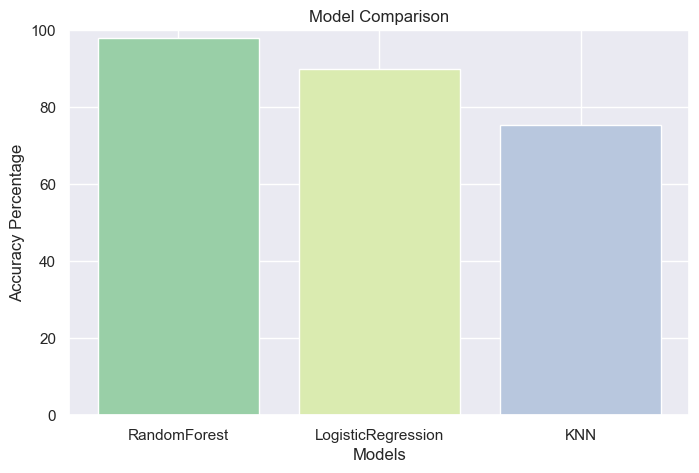

Precision for RandomForestClassifier: 0.9846153846153847
Precision for KNeighborsClassifier: 0.8947368421052632

Classification Report for RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98        83
           1       0.98      0.96      0.97        67

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Classification Report for KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.71      0.95      0.81        83
           1       0.89      0.51      0.65        67

    accuracy                           0.75       150
   macro avg       0.80      0.73      0.73       150
weighted avg       0.79      0.75      0.74       150



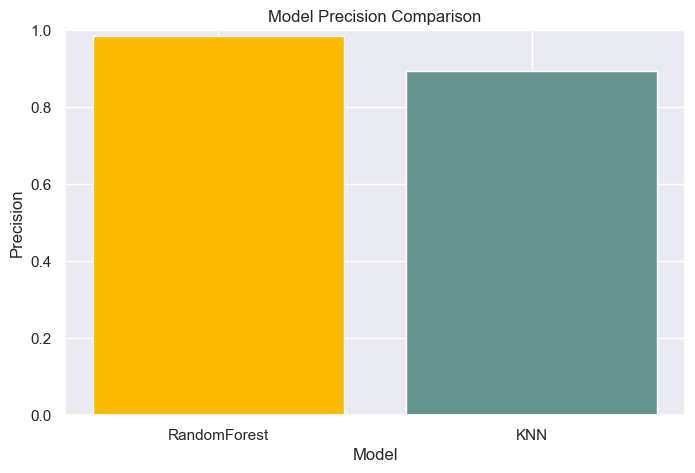

In [10]:
# Load the dataset
df = pd.read_csv('merged_google_news.csv')

# Map 'Fake' to 1 and 'Real' to 0 and create a new column 'Cate_Real_Fake'
df['Cate_Real_Fake'] = df['Refined-label'].map({'Fake': 0, 'Real': 1})

# Save the modified DataFrame back to a new CSV file, if needed
df.to_csv('merged_google_news.csv', index=False)


# Select features and target variable
X = df[['updated_title','word_count', 'char_count','sentiment_polarity','sentiment_subjectivity', 'avg_word', 'stopwords', 'numerics','upper','time_in_hours']]
y = df['Cate_Real_Fake']

# Convert text data to numerical data (example with 'title' column)
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['updated_title']).toarray()
X_numerical = X.drop(columns=['updated_title']).values
X_combined = np.hstack((X_tfidf, X_numerical))


# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Standardize the features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initializing the classifier
classifier_RandomForest = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
classifier_RandomForest.fit(X_train_scaled, y_train)

# Making predictions
y_predrf = classifier_RandomForest.predict(X_test_scaled)
y_predrftrain = classifier_RandomForest.predict(X_train_scaled)

# Evaluating the RandomForest classifier's accuracy on the test set
print(f'Accuracy of RandomForest Classifier:: {accuracy_score(y_test, y_predrf)*100}')


#printing the model file
full_pathrf = 'RandomForestClassifier.joblib'
dump(classifier_RandomForest, full_pathrf)

 # Load the model from the file
model_loaded = load(full_pathrf)

# Create a link to download it
display(FileLink(full_pathrf, result_html_prefix="Click here to download: "))


# Initializing the logistic regression classifier
classifier_LR = LogisticRegression(random_state=42, max_iter=1000)

# Train the classifier
classifier_LR.fit(X_train_scaled, y_train)
# Making predictions
y_predlr = classifier_LR.predict(X_test_scaled)
y_predLRtrain = classifier_LR.predict(X_train_scaled)

# Evaluating the classifier
print(f'Accuracy of Logistic Regression Classifier: {accuracy_score(y_test, y_predlr)*100}')

#printing the model file
full_pathlr = 'LogisticRegression.joblib'
dump(LogisticRegression, full_pathlr)
 # Load the model from the file
model_loaded = load(full_pathlr)

# Create a link to download it
display(FileLink(full_pathlr, result_html_prefix="Click here to download: "))


# Initializing and train the KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Making predictions on the scaled test set using the trained KNN classifier
predictionsTest = knn.predict(X_test_scaled)
predictionsTrain = knn.predict(X_train_scaled)

# Evaluating the KNN classifier's accuracy on the test set
accuracyTest = accuracy_score(y_test, predictionsTest)
accuracyTrain = accuracy_score(y_train, predictionsTrain)

print(f'Accuracy KNeighborsClassifier: {accuracyTest*100}')
#printing the model file
full_pathkn = 'KNeighborsClassifier.joblib'
dump(KNeighborsClassifier, full_pathkn)

 # Load the model from the file
model_loaded = load(full_pathkn)

# Create a link to download it
display(FileLink(full_pathkn, result_html_prefix="Click here to download: "))


# Visualize the comparison of model accuracies
model_names = ['RandomForest', 'LogisticRegression', 'KNN']
accuracies = [accuracy_score(y_test, classifier_RandomForest.predict(X_test_scaled))*100, accuracy_score(y_test, classifier_LR.predict(X_test_scaled))*100, accuracy_score(y_test, knn.predict(X_test_scaled))*100]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['#99cfa7', '#daebb0', '#b8c7de'])
plt.xlabel('Models')
plt.ylabel('Accuracy Percentage')
plt.title('Model Comparison')
plt.ylim(0, 100)
plt.show()


# Define hyperparameter grids for RandomForestClassifier and KNeighborsClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

# Initializing GridSearchCV for both RandomForestClassifier and KNeighborsClassifier
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, scoring='precision', cv=5)
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, scoring='precision', cv=5)

# Perform grid search to find the best hyperparameters for both models
grid_search_rf.fit(X_train_scaled, y_train)
grid_search_knn.fit(X_train_scaled, y_train)

# Retrieve the best estimators from the grid search
best_rf = grid_search_rf.best_estimator_
best_knn = grid_search_knn.best_estimator_


# Making predictions using the best RandomForest and KNN models
rf_predictions = best_rf.predict(X_test_scaled)
knn_predictions = best_knn.predict(X_test_scaled)

# Calculate and print the precision score for the best RandomForest and KNN models
rf_precision = precision_score(y_test, rf_predictions)
knn_precision = precision_score(y_test, knn_predictions)
print(f"Precision for RandomForestClassifier: {rf_precision}")
print(f"Precision for KNeighborsClassifier: {knn_precision}")

# Print classification reports for the best RandomForest and KNN models
print("\nClassification Report for RandomForestClassifier:\n", classification_report(y_test, rf_predictions))
print("\nClassification Report for KNeighborsClassifier:\n", classification_report(y_test, knn_predictions))


# Visualize the precision of the best RandomForest and KNN models
model_names = ['RandomForest', 'KNN']
precisions = [rf_precision, knn_precision]

plt.figure(figsize=(8, 5))
plt.bar(model_names, precisions, color=['#fcba03', '#669490'])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Precision Comparison')
plt.ylim(0, 1)
plt.show()

#Saving the logistic regression model model using Pickle 
filename_llr = 'logisticregression.pkl'
pickle.dump(classifier_LR, open(filename_llr, 'wb'))


# Modelling and evaluation

***Load the Logistic Regression Model:*** The model is loaded from a file named 'logisticregression.pkl' using the pickle library. This file contains the pre-trained Logistic Regression classifier.
Make Predictions: The model is used to predict the outcomes for the test dataset (X_test_scaled). It also calculates the probabilities of the positive class (y_pred_proba_lr).


***Evaluating Model Performance:***
The recall_score function computes the recall for the model, which is the ability of the classifier to find all the positive samples.

The f1_score function computes the F1 score, which is the harmonic mean of precision and recall.

***Calculate AUC-ROC:*** The roc_auc_score function calculates the Area Under the Curve (AUC) of the ROC, which is a measure of the model's ability to distinguish between the classes.

***Generate ROC Curve Values:*** The roc_curve function computes the false positive rate (fpr_lr), true positive rate (tpr_lr), and thresholds used to plot the ROC curve.

***Plot ROC Curve:*** The code then plots the ROC curve using matplotlib.pyplot. The curve plots the true positive rate against the false positive rate at various threshold settings. The area under the curve (AUC) is also displayed in the legend.

Recall for Logistic Regression: 0.8805970149253731
F1 Score for Logistic Regression: 0.887218045112782


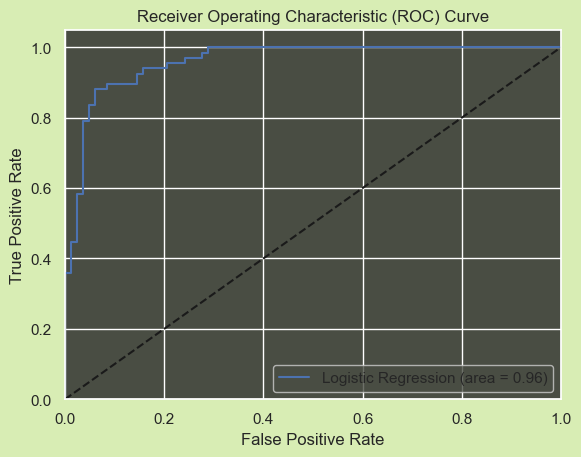

In [24]:

# Loading the Logistic Regression model
filename_llr = 'logisticregression.pkl'
classifier_LR = pickle.load(open(filename_llr, 'rb'))

# X_test_scaled and y_test are already defined as shown in your code

# Making predictions with the Logistic Regression model
y_pred_lr = classifier_LR.predict(X_test_scaled)
y_pred_proba_lr = classifier_LR.predict_proba(X_test_scaled)[:, 1]

# Calculate recall and F1 score
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f'Recall for Logistic Regression: {recall_lr}')
print(f'F1 Score for Logistic Regression: {f1_lr}')

# Calculate AUC-ROC

# The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and false positive rate (FPR) across different thresholds. A model that performs better than random guessing will have an AUC-ROC greater than 0.5, and the closer the AUC-ROC is to 1, the better the model 

roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Generate ROC curve values: fpr, tpr, thresholds
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Code Reproducibility

The Logistic Regression model is trained with `fit` on `X_train` and `y_train`, using `max_iter=1000`. Predictions are made on `X_test`. Performance metrics include accuracy, precision, recall, and F1-score. The model is saved with `dump` and reloaded with `load`. Cross-validation is performed with `cross_val_score`. Accuracy, precision, recall, and F1-score are printed. The confusion matrix is visualized with `ConfusionMatrixDisplay`, showing true positives, false positives, true negatives, and false negatives.

/Users/siddhantdhyani/BA/SEM2/Python/Assignment3/MS5114_Assignment3/LogisticRegression.joblib

Logistic Regression Accuracy: 0.9333, Precision: 0.9339, Recall: 0.9311, F1-Score: 0.9324


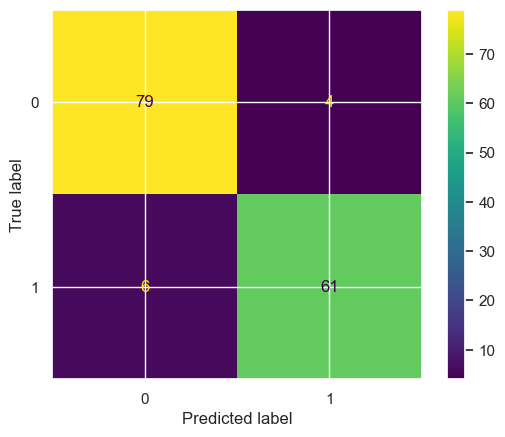

In [12]:
# Train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
precision_lr = precision_score(y_test, y_pred_log_reg, average='macro')
recall_lr = recall_score(y_test, y_pred_log_reg, average='macro')
f1_lr = f1_score(y_test, y_pred_log_reg, average='macro')

#printing the model file
full_pathlr = 'LogisticRegression.joblib'
dump(log_reg , full_pathlr)

 # Load the model from the file
model_loaded = load(full_pathlr)


# Create a link to download it
display(FileLink(full_pathlr, result_html_prefix="Click here to download: "))

    
# Cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')


# Evaluating the model
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-Score: {f1_lr:.4f}")
#Confusion matrix for logistic regression
cm = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Data visualizations

# EDA for pair ploting between numerical features of a News


1. **'sentiment_polarity'**: This feature represents the sentiment polarity of the news titles, where values close to -1 indicate negative sentiment, values close to 1 indicate positive sentiment, and values around 0 indicate neutral sentiment. The distribution appears to be centered around 0, suggesting a balance of sentiments in the dataset.

2. **'sentiment_subjectivity'**: This feature measures the subjectivity of the text, with values closer to 1 indicating more subjective text and values closer to 0 indicating more objective text. The distribution seems to be fairly uniform, indicating a varied range of subjectivity in the news titles.

3. **'word_count'**: This feature represents the number of words in the news titles. The distribution is skewed to the right, indicating that most news titles are short, with fewer titles being longer.

4. **'char_count'**: This feature represents the number of characters in the news titles. Similar to 'word_count', the distribution is right-skewed, which is expected since longer titles will also have more characters.

5. **'avg_word'**: This feature likely represents the average word length in the news titles. The distribution is more normally distributed, suggesting that the average word length does not vary as much across different titles.

6. **'stopwords'**: This feature counts the number of common stopwords in the news titles. The distribution is right-skewed, indicating that many titles have few or no stopwords, while a smaller number of titles have more.

7. **'numerics'**: This feature counts the number of numeric characters in the news titles. The distribution is heavily skewed to the right, showing that numeric characters are not common in news titles.

8. **'upper'**: This feature counts the number of uppercase words in the news titles. The distribution is right-skewed, suggesting that uppercase words are not frequently used in news titles.

9. **'time_in_hours'**: This feature likely represents the time since the news was published, measured in hours. The distribution is not visible in the provided pairplot image, but it would typically be right-skewed if most news articles are recent.


- Some features, such as 'word_count' and 'char_count', show a positive correlation, which is expected as longer titles will naturally have more characters.
- The scatter plots involving 'numerics' and 'upper' show many points clustered near the origin, which indicates that many news titles do not contain numerics or uppercase words.

/Users/siddhantdhyani/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


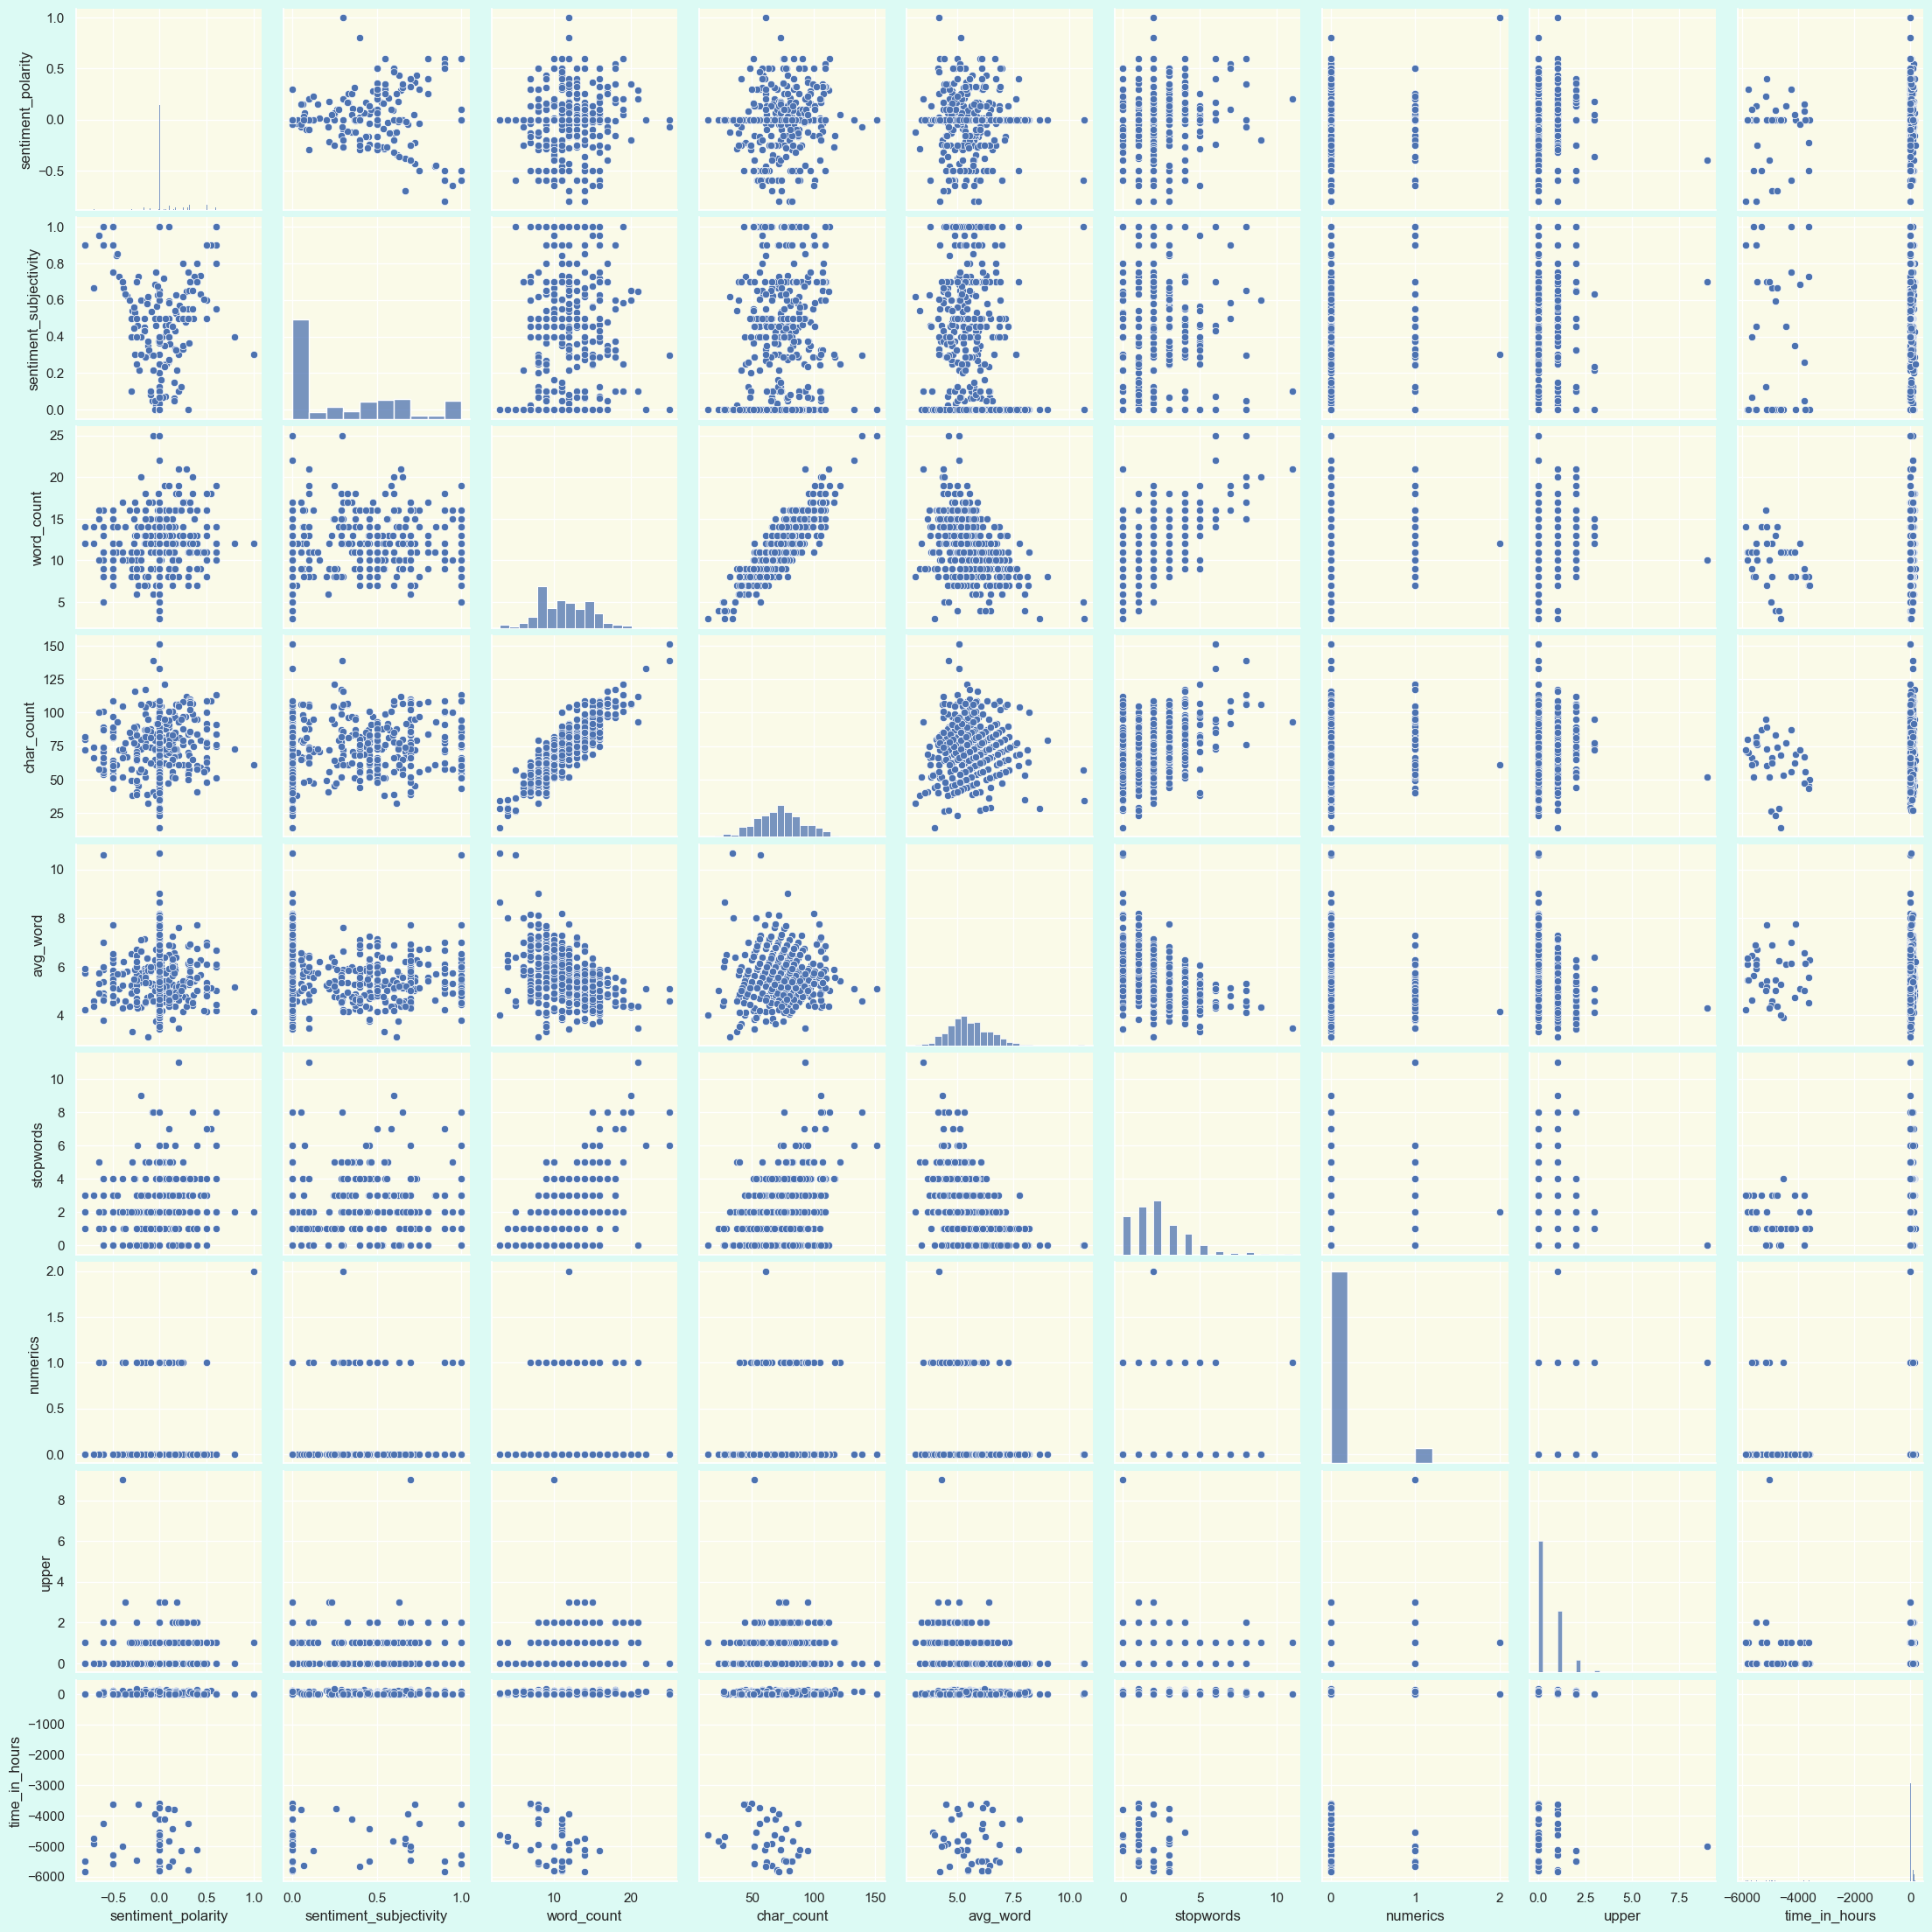

In [13]:
# Selecting the numerical features for the pair plot
numerical_features = ['updated_title', 'sentiment_polarity', 'sentiment_subjectivity', 'word_count', 'char_count', 'avg_word', 'stopwords', 'numerics', 'upper','time_in_hours']
# Customize the seaborn and matplotlib visual settings for the plots
sns.set(rc={"axes.facecolor":"#fafae8","figure.facecolor":"#dcfaf4"})
    
# Create a pair plot of the selected numerical features to visualize pairwise relationships in the dataset
sns.pairplot(df[numerical_features])
  
# Show the plot
plt.show()

# Data visualizations

# EDA for corelation between numerical coloumns

The heatmap uses a color scale to indicate the strength and direction of the correlation, with red representing a strong positive correlation, blue representing a strong negative correlation, and colors closer to white indicating weaker correlations.
Analyzing the heatmap, we can make several observations:

***'sentiment_polarity' and 'sentiment_subjectivity'***: There is a slight negative correlation (-0.086) between these two features, suggesting that titles with more positive or negative sentiments tend to be less subjective.

***'word_count' and 'char_count'***: A very strong positive correlation (0.91) is observed, indicating that longer titles have more characters, as expected.

***'word_count' and 'stopwords'***: A moderate positive correlation (0.54) suggests that longer titles tend to include more stopwords.

***'word_count' and 'avg_word'***: A moderate negative correlation (-0.38) indicates that titles with more words tend to have shorter average word lengths.

***'char_count' and 'avg_word'***: This moderate negative correlation (-0.38) aligns with the observation that longer titles, which have more characters, tend to have shorter words on average.

***'stopwords' and 'avg_word'***: A moderate negative correlation (-0.4) suggests that titles with more stopwords have shorter average word lengths.

***'upper' and 'avg_word'***: A small positive correlation (0.17) indicates that titles with longer average word lengths may use more uppercase words.

***'time_in_hours'***: This feature shows very weak correlations with other features, suggesting that the time since publication is not strongly related to the textual characteristics of the news titles.

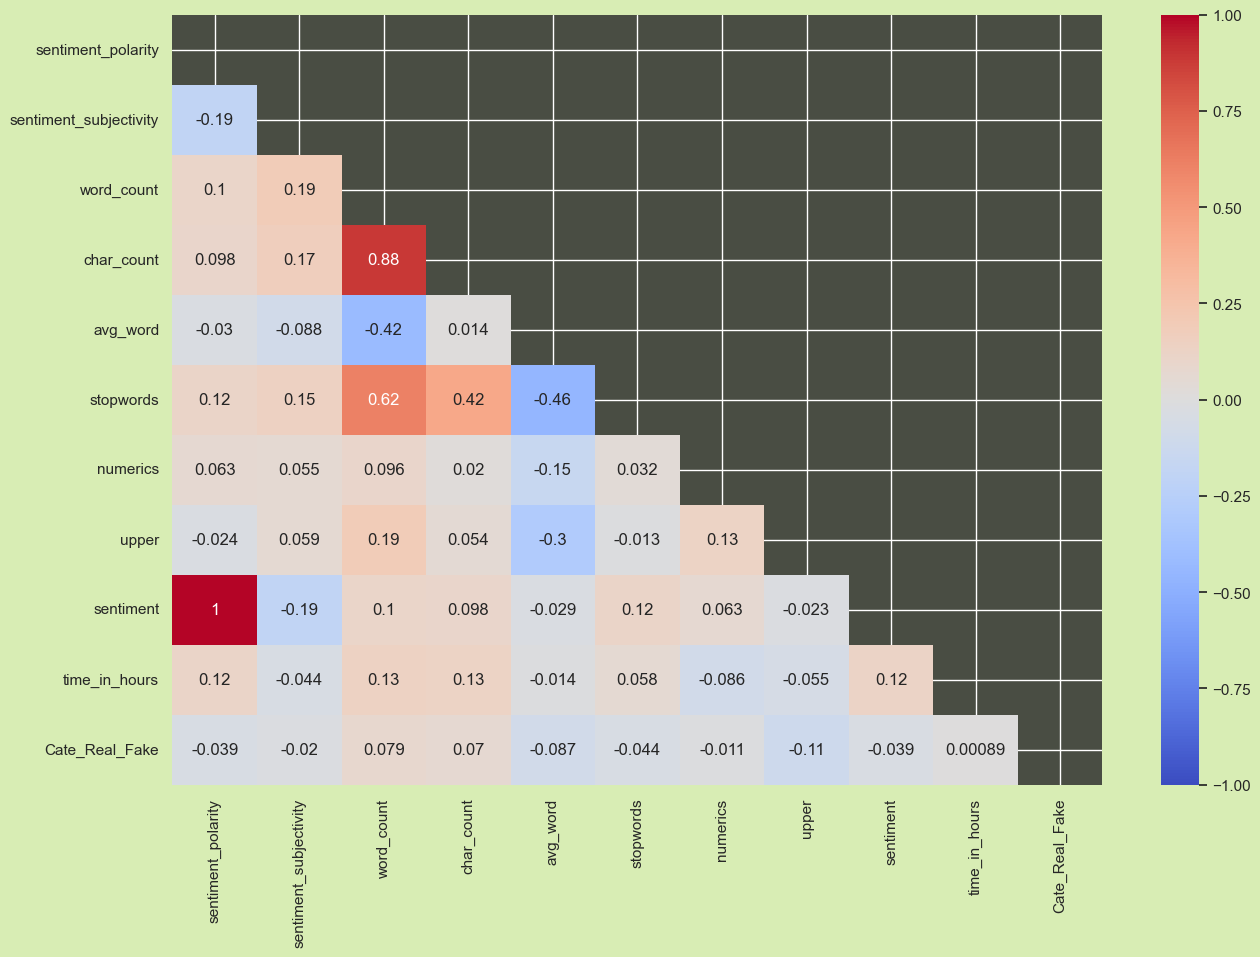

In [14]:
#Count the numerical columns
# Select columns in the DataFrame that are of numerical type (either float64 or int64)
df=df.drop('hastags', axis=1)
df=df.drop('link_body',axis=1)
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]

# Display the shape of the DataFrame containing only numerical columns
# This shows the number of rows and columns, where the number of columns indicates the count of numerical columns
numerical_cols.shape

#Describe the Numerical coloumns 
numerical_cols.describe()


#heatmap for correlation
# Calculate the correlation matrix for numerical columns to understand the relationships between them
correralation = numerical_cols.corr()

# Initializing a mask to zero with the same shape as the correlation matrix
mask = np.zeros_like(correralation)

# Use the mask to cover the upper triangle of the correlation matrix, as it is mirrored across the diagonal
mask[np.triu_indices_from(mask)] = True

# Set the visual style of the plots to 'white' for a clean background
sns.set_style('white')

# Customize the seaborn and matplotlib visual settings for the plots
sns.set(rc={"axes.facecolor":"#494d43","figure.facecolor":"#d8edb4"})

# Create a figure with a specified size to ensure the heatmap is large enough to be readable
plt.figure(figsize=(15, 10))

# Plot the heatmap for the correlation matrix
# 'mask' is used to hide the upper triangle for better readability
# 'annot=True' displays the correlation coefficients in the heatmap cells
# 'vmin' and 'vmax' set the color scale limits for the heatmap
# 'cmap' defines the color palette used for indicating correlation values
sns.heatmap(correralation, mask=mask, annot=True, vmin=-1, vmax=1,cmap='coolwarm')

# Display the heatmap
plt.show()

# Insights

***Prevalence of Fake News***
The bar chart shows a stark contrast in the count of fake versus real news articles, with fake news appearing significantly more often (293) compared to real news (175). This indicates a concerning prevalence of fake news in the dataset, emphasizing the critical need for effective detection and verification mechanisms to maintain the integrity of information dissemination in digital media

In [15]:
# Using Plotly Express to plot the distribution of Real vs. Fake News
fig = px.histogram(df, x='Refined-label', color='Refined-label',
                   title='Distribution of Real vs. Fake News',
                   labels={'Refined-label': 'News Type'},  # Customizing axis labels
                   color_discrete_map={'Real': '#636EFA', 'Fake': '#EF553B'},  # Customizing colors
                   text_auto=True,  # Display count on the bars
                   )

# Customizing the layout
fig.update_layout(xaxis_title='News Type',
                  yaxis_title='Count',
                  template='plotly_dark',
                 title_x=0.5)

# Showing the plot
fig.show()

# Insights

This pair of violin plots compares the sentiment polarity and subjectivity between real and fake news items. Sentiment polarity shows how positive or negative the content is, while subjectivity indicates how much personal opinion versus factual information is present.

***Sentiment Polarity***: Both real and fake news exhibit a broad range of sentiment polarity, but fake news shows a slightly wider spread, suggesting a more varied emotional tone.

***Sentiment Subjectivity***: Fake news shows a marginally higher median subjectivity than real news, which could indicate a tendency to include more opinion-based content.

In [16]:
# Creating subplot layout
fig = make_subplots(rows=1, cols=2, subplot_titles=('Sentiment Polarity Distribution\nReal vs. Fake News',
                                                    'Sentiment Subjectivity Distribution\nReal vs. Fake News'))

# Sentiment Polarity Comparison between Real and Fake News
fig.add_trace(go.Violin(x=df['Refined-label'][df['sentiment_polarity'].notnull()],
                        y=df['sentiment_polarity'][df['sentiment_polarity'].notnull()],
                        legendgroup='Real', scalegroup='Real', name='Real',
                        line_color='blue'), row=1, col=1)

fig.add_trace(go.Violin(x=df['Refined-label'][df['sentiment_polarity'].notnull()],
                        y=df['sentiment_polarity'][df['sentiment_polarity'].notnull()],
                        legendgroup='Fake', scalegroup='Fake', name='Fake',
                        line_color='red'), row=1, col=1)

# Sentiment Subjectivity Comparison between Real and Fake News
fig.add_trace(go.Violin(x=df['Refined-label'][df['sentiment_subjectivity'].notnull()],
                        y=df['sentiment_subjectivity'][df['sentiment_subjectivity'].notnull()],
                        legendgroup='Real', scalegroup='Real', name='Real',
                        line_color='blue'), row=1, col=2)

fig.add_trace(go.Violin(x=df['Refined-label'][df['sentiment_subjectivity'].notnull()],
                        y=df['sentiment_subjectivity'][df['sentiment_subjectivity'].notnull()],
                        legendgroup='Fake', scalegroup='Fake', name='Fake',
                        line_color='red'), row=1, col=2)

# Updating axis labels
fig.update_traces(meanline_visible=True)
fig.update_xaxes(title_text="News Type", row=1, col=1)
fig.update_yaxes(title_text="Sentiment Polarity", row=1, col=1)
fig.update_xaxes(title_text="News Type", row=1, col=2)
fig.update_yaxes(title_text="Sentiment Subjectivity", row=1, col=2)

# Updating layout for better readability
fig.update_layout(violingap=0, violinmode='overlay', title_text="Sentiment Analysis: Real vs. Fake News",title_x=0.5)
fig.show()

# Insights

*** Temporal Trends in News Authenticity***:
The provided bar chart compares the counts of real versus fake news over time. Each bar represents a different date, with blue indicating fake news and red representing real news. There's a noticeable fluctuation in the counts, with some dates showing a higher prevalence of fake news.

In [17]:
# Plotting the distribution of publication times for real and fake news using Plotly Express
fig = px.histogram(df, x='time', color='Refined-label',
                   category_orders={'time_category': ['Hours Ago', 'Yesterday', 'Days Ago']},  # Ensuring the order of categories
                   barmode='group',  # Grouping bars instead of stacking
                   labels={'time_category': 'Publication Time Category', 'Refined-label': 'News Type'},
                   title='Publication Time Distribution<br>Real vs. Fake News')

# Customizing the layout
fig.update_layout(xaxis_title='Publication Time Category',
                  yaxis_title='Count',
                  legend_title='News Type',
                  template='plotly_white',
                 title_x=0.5)

# Showing the plot
fig.show()

# Results and recommendations

**Implement Dynamic Sentiment Analysis:** Digital platforms should integrate sentiment analysis tools that flag content with extreme sentiment values for further review, as these may indicate manipulative intent or emotionally charged misinformation.

**Develop Time-sensitive Detection Mechanisms:** Platforms need to utilize temporal analysis to identify and respond to anomalous spikes in news publication, which could signify coordinated disinformation efforts.
Refine Machine Learning Models for Content Verification: Media outlets and platforms should continuously refine and implement AI-based models, like Random Forest and KNN classifiers, to enhance real-time content verification processes.


**Customize Models for Genre-specific Accuracy:** Given the diverse linguistic features across different news genres, developing and applying genre-specific machine learning models will improve the precision of fake news detection.


**Educate and Empower Users:** Platforms should use insights from the analysis to create educational content and tools that help users recognize and critically assess potentially fake news, promoting a more discerning consumption of digital media.


**Adopt Continuous Learning Frameworks:** To keep pace with evolving disinformation tactics, it's crucial to establish a framework for continuous model learning and updating, ensuring detection mechanisms adapt to new misinformation trends effectively.


# References

**Balshetwar, S.V., RS, A. and R, D.J. (2023). Fake news detection in social media based on sentiment analysis using classifier techniques. Multimedia Tools and Applications. doi:https://doi.org/10.1007/s11042-023-14883-3.** 

**Uzun, E. (2020). A Novel Web Scraping Approach Using the Additional Information Obtained From Web Pages. IEEE Access, 8, pp.61726–61740. doi:https://doi.org/10.1109/access.2020.2984503.**

**Kho, E. (2023). 'Fake news detection algorithm with Python'. Medium. Available at: https://medium.com/@ethanrkho/fake-news-detection-algorithm-with-python-f7267e3d5d2e [5th April, 2024].
Uzun, E. (2020). A Novel Web Scraping Approach Using the Additional Information Obtained From Web Pages. IEEE Access, 8, pp.61726–61740. doi:https://doi.org/10.1109/access.2020.2984503.**

**Mitchell, R.E. (2018). Web scraping with Python : collecting more data from the modern web. Sebastopol, Ca: O’reilly Media.**
